In [1]:
import numpy as np 
import pandas as pd
import os, sys
from time import time
from scipy import ndimage
#from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers, optimizers, callbacks
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization,Convolution2D, MaxPooling2D
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
FileName = r"C:\Users\sidda\Desktop\plots\Figure13model\mapped_data\AllRunsmapped.csv"
df = pd.read_csv(FileName)
print(df.shape)
df.head()

(2569, 8)


,Address,Element,FileName,Recovery,Run,SheetName,Sl_No,Stage
0,C:\Users\sidda\Desktop\plots\Figure13model\Cle...,Lead,Cell1 19h 06m 48.7750s.jpg,7.548923,1,R1_Lead,2,1
1,C:\Users\sidda\Desktop\plots\Figure13model\Cle...,Lead,Cell1 19h 06m 58.5150s.jpg,8.758845,1,R1_Lead,3,1
2,C:\Users\sidda\Desktop\plots\Figure13model\Cle...,Lead,Cell1 19h 07m 10.1370s.jpg,9.605029,1,R1_Lead,4,1
3,C:\Users\sidda\Desktop\plots\Figure13model\Cle...,Lead,Cell1 19h 07m 20.7539s.jpg,10.123912,1,R1_Lead,5,1
4,C:\Users\sidda\Desktop\plots\Figure13model\Cle...,Lead,Cell1 19h 07m 32.409s.jpg,10.577631,1,R1_Lead,6,1


In [3]:
df = df[df.Element == 'Lead']
print(df.shape)
df.head()

(1022, 8)


,Address,Element,FileName,Recovery,Run,SheetName,Sl_No,Stage
0,C:\Users\sidda\Desktop\plots\Figure13model\Cle...,Lead,Cell1 19h 06m 48.7750s.jpg,7.548923,1,R1_Lead,2,1
1,C:\Users\sidda\Desktop\plots\Figure13model\Cle...,Lead,Cell1 19h 06m 58.5150s.jpg,8.758845,1,R1_Lead,3,1
2,C:\Users\sidda\Desktop\plots\Figure13model\Cle...,Lead,Cell1 19h 07m 10.1370s.jpg,9.605029,1,R1_Lead,4,1
3,C:\Users\sidda\Desktop\plots\Figure13model\Cle...,Lead,Cell1 19h 07m 20.7539s.jpg,10.123912,1,R1_Lead,5,1
4,C:\Users\sidda\Desktop\plots\Figure13model\Cle...,Lead,Cell1 19h 07m 32.409s.jpg,10.577631,1,R1_Lead,6,1


In [4]:
#Setting and Cropping image files
   #Set Image crop dimensions- Set it to 128 * 128
left=115
top=35
right=243
bottom=163

train_files = []
y_train = []
dataset = []
for index, row in df.iterrows():
    y_train.append(row['Recovery']) 
    img = load_img(row['Address'])  # this is a PIL image
    
    img1 = img.crop((left,top,right,bottom))
    
    #img2 =img1.thumbnail((128, 128))
    x = img_to_array(img1)
    #x = x.reshape((3, 128, 128))
    #x = (x - 128.0) / 128.0
    x = (x - 255.0) / 255.0
    dataset.append(x)

In [5]:
print(len(y_train))

1022


In [6]:
from sklearn.model_selection import train_test_split

# Setting ratios of Training,validation and testing
test_to_train=0.4
val_to_test=0.5


#Splitting 
X_train, X_test, y_train, y_test = train_test_split(dataset, y_train, test_size=test_to_train, random_state=33)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=val_to_test, random_state=33)
print("Train set size: {0}, Val set size: {1}, Test set size: {2}".format(len(X_train), len(X_val), len(X_test)))

Train set size: 613, Val set size: 205, Test set size: 204


In [9]:
# CNN Architecture
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation = 'linear'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
batch_normalization_v1 (Batc (None, 63, 63, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
batch_normalization_v

In [11]:
model.compile(loss=rmse, optimizer='rmsprop', metrics=['mae'])

In [15]:
#model.fit([X_train], y_train, batch_size = 32, epochs = 15)

my_callbacks = EarlyStopping(monitor="mean_absolute_error", patience=6, mode="auto")

model.fit([X_train], y_train, batch_size=32,
                    epochs=200, 
                  validation_data=([X_val], y_val))

#hist = model.fit([X_train], y_train, batch_size=32, epochs=200, verbose=1, validation_data=([X_val], y_val), callbacks=[my_callbacks])



Train on 613 samples, validate on 205 samples
Epoch 1/200
613/613 [==============================] - 28s 46ms/sample - loss: 6.2028 - mean_absolute_error: 5.3197 - val_loss: 10.3202 - val_mean_absolute_error: 9.8301
Epoch 2/200
613/613 [==============================] - 25s 41ms/sample - loss: 4.3903 - mean_absolute_error: 3.5486 - val_loss: 9.7408 - val_mean_absolute_error: 9.2295
Epoch 3/200
613/613 [==============================] - 26s 42ms/sample - loss: 4.0990 - mean_absolute_error: 3.2954 - val_loss: 6.7713 - val_mean_absolute_error: 6.1734
Epoch 4/200
613/613 [==============================] - 25s 41ms/sample - loss: 3.6479 - mean_absolute_error: 2.9969 - val_loss: 4.4091 - val_mean_absolute_error: 3.8556
Epoch 5/200
613/613 [==============================] - 26s 42ms/sample - loss: 3.7198 - mean_absolute_error: 3.0076 - val_loss: 3.7307 - val_mean_absolute_error: 3.2149
Epoch 6/200
613/613 [==============================] - 25s 40ms/sample - loss: 3.7579 - mean_absolute_error:

Epoch 49/200
613/613 [==============================] - 27s 45ms/sample - loss: 2.5862 - mean_absolute_error: 2.0786 - val_loss: 2.5877 - val_mean_absolute_error: 2.2105
Epoch 50/200
613/613 [==============================] - 26s 42ms/sample - loss: 2.5760 - mean_absolute_error: 2.0091 - val_loss: 1.8327 - val_mean_absolute_error: 1.3225
Epoch 51/200
613/613 [==============================] - 25s 41ms/sample - loss: 2.4534 - mean_absolute_error: 1.8990 - val_loss: 4.5927 - val_mean_absolute_error: 4.3573
Epoch 52/200
613/613 [==============================] - 25s 41ms/sample - loss: 2.7501 - mean_absolute_error: 2.1444 - val_loss: 3.5093 - val_mean_absolute_error: 3.3141
Epoch 53/200
613/613 [==============================] - 25s 41ms/sample - loss: 2.4215 - mean_absolute_error: 1.9519 - val_loss: 3.7683 - val_mean_absolute_error: 3.5218
Epoch 54/200
613/613 [==============================] - 25s 41ms/sample - loss: 2.7365 - mean_absolute_error: 2.1416 - val_loss: 3.7699 - val_mean_abs

In [16]:
predictions_test = model.predict([X_test])

In [17]:
#Finding the R-squared values of Regression
from sklearn.metrics import r2_score
Rsquared_testset=r2_score(y_test, predictions_test)
print(Rsquared_testset)

-6.473812691260793


In [18]:
#Training and Validation Rsquared
predictions_train= model.predict([X_train])
predictions_val=model.predict([X_val])
Rsquared_trainset=r2_score(y_train, predictions_train)
Rsquared_valset=r2_score(y_val, predictions_val)
print(Rsquared_trainset)
print(Rsquared_valset)

-5.905172898344764
-5.749761927369314


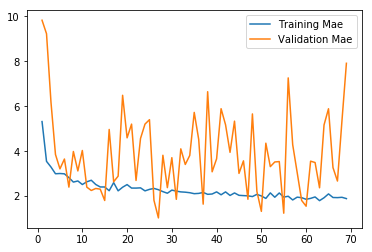

In [19]:
epoch_list = list(range(1, len(hist.history['mean_absolute_error']) + 1))
plt.plot(epoch_list, hist.history['mean_absolute_error'], epoch_list, hist.history['val_mean_absolute_error'])
plt.legend(("Training Mae", "Validation Mae"))
plt.show()